In [ ]:
# Predictive Modeling for Stock Analysis
In this notebook, we build machine learning models to predict stock prices and analyze their performance.


In [2]:
# Import dependencies 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt


In [3]:
# Load the dataset using the correct path
data = pd.read_csv('data/AAPL_data_with_beta.csv')

# Display the first few rows to confirm the data is loaded correctly
print(data.head())




         Date          Adj Close              Close               High  \
0         NaN               AAPL               AAPL               AAPL   
1  2020-01-02   72.7960205078125   75.0875015258789   75.1500015258789   
2  2020-01-03   72.0882797241211  74.35749816894531   75.1449966430664   
3  2020-01-06  72.66270446777344  74.94999694824219  74.98999786376953   
4  2020-01-07  72.32097625732422  74.59750366210938   75.2249984741211   

                 Low               Open     Volume  Stock Return  Rolling Beta  
0               AAPL               AAPL       AAPL           NaN           NaN  
1  73.79750061035156  74.05999755859375  135480400           NaN           NaN  
2             74.125   74.2874984741211  146322800     -0.009722           NaN  
3            73.1875  73.44750213623047  118387200      0.007968           NaN  
4  74.37000274658203  74.95999908447266  108872000     -0.004703           NaN  


In [5]:
# Inspect coloumn values 
print("Unique values in 'Close':")
print(data['Close'].unique())


Unique values in 'Close':
['AAPL' '75.0875015258789' '74.35749816894531' '74.94999694824219'
 '74.59750366210938' '75.79750061035156' '77.40750122070312'
 '77.5824966430664' '79.23999786376953' '78.16999816894531'
 '77.83499908447266' '78.80999755859375' '79.68250274658203'
 '79.14250183105469' '79.42500305175781' '79.80750274658203'
 '79.57749938964844' '77.23750305175781' '79.42250061035156'
 '81.08499908447266' '80.96749877929688' '77.37750244140625'
 '77.16500091552734' '79.7125015258789' '80.36250305175781'
 '81.30249786376953' '80.00749969482422' '80.38749694824219'
 '79.90249633789062' '81.80000305175781' '81.21749877929688'
 '81.23750305175781' '79.75' '80.90499877929688' '80.07499694824219'
 '78.26249694824219' '74.54499816894531' '72.0199966430664'
 '73.1624984741211' '68.37999725341797' '68.33999633789062'
 '74.70249938964844' '72.33000183105469' '75.68499755859375'
 '73.2300033569336' '72.25749969482422' '66.5425033569336'
 '71.33499908447266' '68.85749816894531' '62.057498

In [6]:
# Convert coloumn to numeric 
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')


In [9]:
# Handle missing values 
print("Number of missing values in 'Close':", data['Close'].isnull().sum())

data.dropna(subset=['Close'], inplace=True)



Number of missing values in 'Close': 0


In [17]:
# 50-day and 200-day Simple Moving Averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Bollinger Bands
data['Rolling Mean'] = data['Close'].rolling(window=20).mean()
data['Rolling Std'] = data['Close'].rolling(window=20).std()
data['Upper Band'] = data['Rolling Mean'] + (2 * data['Rolling Std'])
data['Lower Band'] = data['Rolling Mean'] - (2 * data['Rolling Std'])

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Verify the indicators
print(data[['SMA_50', 'SMA_200', 'Rolling Mean', 'Upper Band', 'Lower Band', 'RSI']].head())
print(data[['SMA_50', 'SMA_200', 'Rolling Mean', 'Upper Band', 'Lower Band', 'RSI']].iloc[50:55])


   SMA_50  SMA_200  Rolling Mean  Upper Band  Lower Band  RSI
0     NaN      NaN           NaN         NaN         NaN  NaN
1     NaN      NaN           NaN         NaN         NaN  NaN
2     NaN      NaN           NaN         NaN         NaN  NaN
3     NaN      NaN           NaN         NaN         NaN  NaN
4     NaN      NaN           NaN         NaN         NaN  NaN
      SMA_50  SMA_200  Rolling Mean  Upper Band  Lower Band        RSI
50  76.45170      NaN     73.158374   83.463439   62.853310  45.068568
51  76.16100      NaN     72.124124   83.142438   61.105810  40.052915
52  75.93815      NaN     71.297374   82.387565   60.207183  41.593070
53  75.67250      NaN     70.335499   81.252773   59.418226  43.998928
54  75.40445      NaN     69.391499   80.024178   58.758821  43.661286


In [18]:
# Drop Initial Rows with NaN Values
data.dropna(subset=['SMA_50', 'SMA_200', 'Rolling Mean', 'RSI'], inplace=True)
print(data.head())


           Date           Adj Close       Close                High  \
199  2020-10-14  118.30213165283203  121.190002  123.02999877929688   
200  2020-10-15   117.8335952758789  120.709999  121.19999694824219   
201  2020-10-16  116.18385314941406  119.019997  121.55000305175781   
202  2020-10-19     113.21630859375  115.980003  120.41999816894531   
203  2020-10-20   114.7098388671875  117.510002   118.9800033569336   

                    Low                Open     Volume  Stock Return  \
199  119.62000274658203               121.0  150712000      0.000743   
200   118.1500015258789  118.72000122070312  112559200     -0.003961   
201  118.80999755859375  121.27999877929688  115393800     -0.014001   
202  115.66000366210938  119.95999908447266  120639300     -0.025542   
203  115.62999725341797  116.19999694824219  124423700      0.013192   

     Rolling Beta      SMA_50    SMA_200  Rolling Mean  Rolling Std  \
199      1.855315  116.710049  88.365387      114.2365     4.636846  

In [19]:
# Re-verifying indicators 
print(data[['Close', 'SMA_50', 'SMA_200', 'Rolling Mean', 'Upper Band', 'Lower Band', 'RSI']].tail())


           Close      SMA_50     SMA_200  Rolling Mean  Upper Band  \
1002  193.600006  185.398801  178.649100    193.668501  199.490535   
1003  193.050003  185.682801  178.871851    193.831501  199.372064   
1004  193.149994  185.971400  179.085250    193.969001  199.282852   
1005  193.580002  186.300001  179.290201    194.179501  199.040519   
1006  192.529999  186.633801  179.487900    194.308501  198.821393   

      Lower Band        RSI  
1002  187.846466  59.246142  
1003  188.290938  49.031934  
1004  188.655150  52.291513  
1005  189.318484  47.920430  
1006  189.795610  40.185177  


In [20]:
# Check the column names
print("Columns in dataset:")
print(data.columns)

# Verify feature availability
required_features = ['RSI', 'SMA_50', 'SMA_200', 'Rolling Mean', 'Rolling Std', 'Rolling Beta']
missing_features = [feature for feature in required_features if feature not in data.columns]

if missing_features:
    print(f"Missing features: {missing_features}")
    raise KeyError(f"The following features are missing from the dataset: {missing_features}")

# Prepare features and target variable
features = required_features  # Update this if needed
target = 'Close'  # Ensure the target column exists

# Create feature matrix X and target vector y
X = data[features]
y = data[target]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets.")



Columns in dataset:
Index(['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Stock Return', 'Rolling Beta', 'SMA_50', 'SMA_200', 'Rolling Mean',
       'Rolling Std', 'Upper Band', 'Lower Band', 'RSI'],
      dtype='object')
Data successfully split into training and testing sets.


In [21]:
# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
print("Linear Regression Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("R-squared (R2):", r2_score(y_test, y_pred_lr))


Linear Regression Results:
Mean Absolute Error (MAE): 2.115318045140128
R-squared (R2): 0.9816341842404492


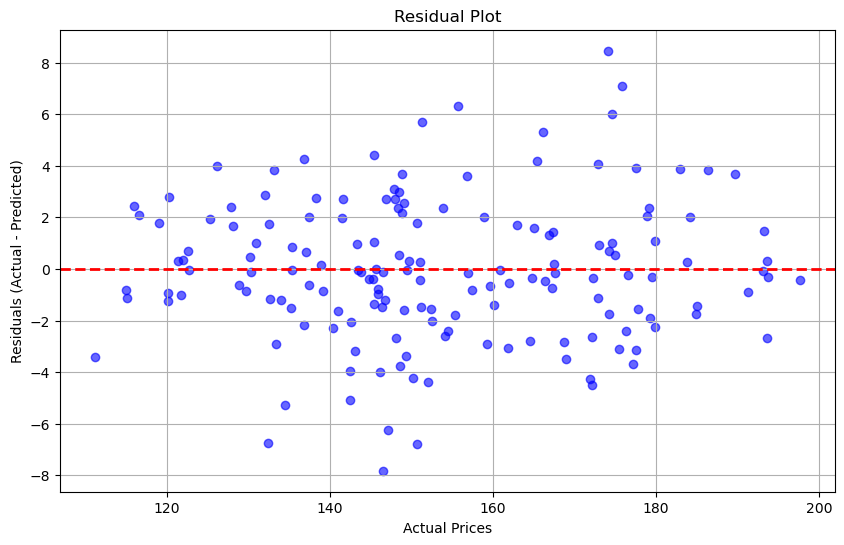

In [24]:
# Calculate residuals
residuals = y_test - y_pred_lr

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.6, color="blue")
plt.axhline(0, color="red", linestyle="--", lw=2)
plt.title("Residual Plot")
plt.xlabel("Actual Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.grid(True)
plt.show()


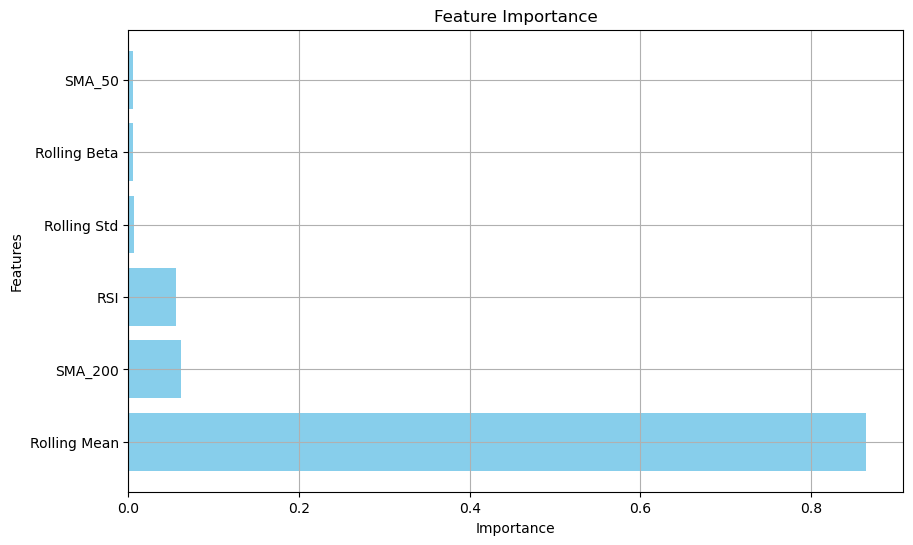

In [25]:
# Feature importance from Random Forest
importance = rf_model.feature_importances_
feature_importance = pd.DataFrame({'Feature': features, 'Importance': importance})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.grid(True)
plt.show()


In [22]:
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("\nRandom Forest Results:")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_rf))
print("R-squared (R2):", r2_score(y_test, y_pred_rf))



Random Forest Results:
Mean Absolute Error (MAE): 1.6399254217265575
R-squared (R2): 0.9885020575561121


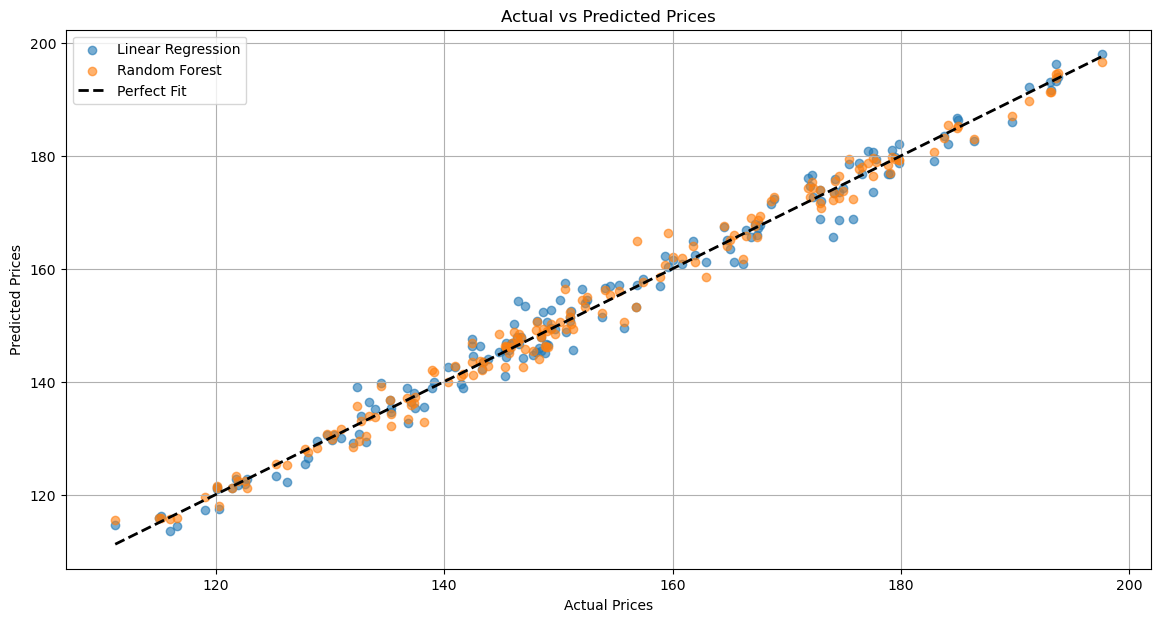

In [23]:
# Compare Actual vs Predicted for both models
plt.figure(figsize=(14, 7))
plt.scatter(y_test, y_pred_lr, label="Linear Regression", alpha=0.6)
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label="Perfect Fit")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
## Next Steps
- Explore advanced time-series models like Long Short-Term Memory (LSTM).
- Use additional evaluation metrics (e.g., RMSE, MAPE).
- Perform hyperparameter tuning to optimize Random Forest and Linear Regression models.
